In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
credits_a = pd.read_csv('credits.csv')
titles_a = pd.read_csv('titles.csv')

In [137]:
titles_a.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [138]:
credits_a.head()

,person_id,id,name,character,role
0,35549,tm89464,Maureen O'Hara,Doris Walker,ACTOR
1,57832,tm89464,John Payne,Fred Gailey,ACTOR
2,57833,tm89464,Edmund Gwenn,Kris Kringle,ACTOR
3,25096,tm89464,Natalie Wood,Susan Walker,ACTOR
4,27185,tm89464,Porter Hall,Granville Sawyer,ACTOR


In [139]:
set(credits_a.role)

{'ACTOR', 'DIRECTOR'}

In [140]:
director_a = credits_a[credits_a['role'] == 'DIRECTOR']

In [141]:
director_a = director_a[['id','name']]

In [142]:
director_a

,id,name
65,tm89464,George Seaton
79,tm61729,James Algar
80,tm61729,Clyde Geronimi
81,tm61729,Jack Kinney
105,tm61052,Wilfred Jackson
...,...,...
30674,tm1314337,Brendan Walter
30675,tm1314337,Jacob Bixenman
30680,tm1299578,William Pinkney III
30687,tm1075680,Kevin Bachar


In [143]:
merged_a = pd.merge(titles_a, director_a, on = 'id')

In [144]:
merged_a = merged_a.rename(columns={'name': 'director'})

In [145]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388,George Seaton
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,James Algar
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],NaN,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman
1564,tm1299578,Black Travel Across America,MOVIE,"Travel Consultant, Martinique Lewis, embarks o...",2023,PG,44,['documentation'],['US'],NaN,NaN,NaN,NaN,5.600,NaN,William Pinkney III
1565,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN,Kevin Bachar


In [146]:
print(merged_a.type.unique())
print('\n')
print(merged_a.production_countries.unique())
print('\n')


['MOVIE' 'SHOW']


["['US']" "['GB', 'US']" "['US', 'GB']" "['CA', 'US']" "['CA']" '[]'
 "['US', 'CA']" "['FR']" "['SE', 'US', 'NO']" "['AU', 'CA', 'FR', 'US']"
 "['SK', 'US']" "['US', 'AT']" "['US', 'NZ']" "['AU', 'US']"
 "['FR', 'US']" "['CA', 'US', 'AU']" "['GB', 'US', 'DE']"
 "['ES', 'CH', 'US', 'FR', 'MC']" "['US', 'DE']" "['GB', 'BE', 'FR']"
 "['PL', 'SI', 'US', 'CZ']" "['US', 'AU']" "['AU']"
 "['GB', 'US', 'DE', 'IE']" "['US', 'IN']" "['JP', 'US']" "['IN', 'US']"
 "['CN', 'HK', 'US']" "['CN']" "['BR', 'US']" "['NZ', 'US']" "['GB']"
 "['DE', 'GB']" "['AR']" "['CI', 'UG', 'US']" "['NL']" "['US', 'FR']"
 "['AE']" "['AU', 'GB']" "['GB', 'US', 'AU']" "['DE']"
 "['US', 'BE', 'GB']" "['US', 'GB', 'DE']" "['ES', 'AR', 'IT']"
 "['CN', 'GB', 'US']" "['IT']" "['US', 'MX']" "['DE', 'US']" "['KR']"
 "['JP']" "['NZ']" "['CL']" "['CA', 'DK', 'US']" "['US', 'CN']" "['AT']"
 "['GB', 'ZA', 'DE', 'US', 'FR']" "['AR', 'BR']"
 "['US', 'CA', 'CN', 'FR', 'JP']" "['US', 'KI']" "['GB', 'FR']" "['PH']"
 

In [147]:
print(merged_a['director'].value_counts)
print('\n')



<bound method IndexOpsMixin.value_counts of 0             George Seaton
1               James Algar
2            Clyde Geronimi
3               Jack Kinney
4           Wilfred Jackson
               ...         
1562         Brendan Walter
1563         Jacob Bixenman
1564    William Pinkney III
1565           Kevin Bachar
1566            Adam Geiger
Name: director, Length: 1567, dtype: object>




In [148]:
print(merged_a.director.value_counts(normalize = True))
print('\n')

Wilfred Jackson        0.014040
John Lasseter          0.010849
Jack Hannah            0.010849
Paul Hoen              0.010211
Clyde Geronimi         0.009572
                         ...   
Manny Coto             0.000638
Bruce W. Smith         0.000638
Eric Bross             0.000638
Michael Lange          0.000638
William Pinkney III    0.000638
Name: director, Length: 899, dtype: float64




In [149]:
#replace null values in the seasons column with 0
print(merged_a.seasons.unique())


[nan  6.  3.  1.  2.  4.]


In [150]:
merged_a.loc[merged_a['seasons'].isnull(), 'seasons'] = 0


print(merged_a.seasons.unique())

print(merged_a.seasons.value_counts())

[0. 6. 3. 1. 2. 4.]
0.0    1475
1.0      66
3.0      12
2.0      10
6.0       2
4.0       2
Name: seasons, dtype: int64


In [151]:
merged_a.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson


In [152]:
print(merged_a.age_certification.unique())

print(merged_a.title.unique())

['G' nan 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']
['Miracle on 34th Street' 'The Adventures of Ichabod and Mr. Toad'
 'Cinderella' ... 'Black Travel Across America'
 "World's Most Dangerous Shark?" 'Baby Sharks']


In [153]:
merged_a.loc[merged_a['age_certification'].isnull(), 'age_certification'] = 'UNRATED'

print(merged_a.age_certification.unique())

['G' 'UNRATED' 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']


In [154]:
print(merged_a.tmdb_score.unique())
print('\n', merged_a.tmdb_score.isnull().sum())

[ 7.388  6.5    7.035  6.999  7.382  7.004  7.11   6.686  6.567  6.733
  7.1    6.713  6.377  6.7    5.876  6.341  6.269  6.846  7.3    7.32
  6.568  6.952  6.489  7.351  7.208  6.3    6.563  6.158  6.81   6.4
  7.     6.583  6.636  6.25   7.298  6.227  6.464  6.012  6.9    6.393
  6.783  6.35   6.1    6.429  6.789  6.559  6.34   6.61   6.982  6.22
  6.283  6.541  7.034  6.811  6.128  5.4    5.927  6.718  5.924  6.382
  5.99   5.955  6.8    6.682  6.     6.821  6.2    8.207  7.706  8.393
  7.569  6.847  7.133  7.008  7.28   6.6    5.813  6.178  6.146  7.166
  7.104  7.225  7.2    6.907  6.029  7.29   5.9    6.364  7.065  7.6
  6.65   6.524  6.581  7.112  6.423  6.533  8.5    5.241  5.967  5.732
  6.475  6.676  6.925  5.655  7.19   6.177  5.6    7.4    6.538  5.81
  6.515  5.2    6.738  6.607  6.522  7.7    7.352  5.778  6.421  8.
  6.714 10.     8.2    4.     9.     7.5    7.403  7.51   7.038  7.89
  7.663  6.71   6.917  6.868  6.254  6.274  6.47   6.805  5.3    6.185
  5.799  7.142  5

In [155]:
for index,value in merged_a['tmdb_score'].items():
    if pd.isnull(value):
        merged_a = merged_a.drop(index)

In [156]:
print('\n', merged_a.tmdb_score.isnull().sum())


 0


In [157]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,tm1304158,Soul of a Nation Presents: Black in Vegas,MOVIE,This special explores the history of Black ent...,2023,PG-13,41,['documentation'],['US'],0.0,NaN,NaN,NaN,2.954,2.000,Tine
1561,tm24952,Whispers: An Elephant's Tale,MOVIE,A nameless baby elephant-steer was just gettin...,2023,G,72,"['drama', 'family']",['US'],0.0,tt0185007,5.0,390.0,4.271,4.600,Dereck Joubert
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman


In [158]:
print(merged_a.release_year.unique())

[1947 1950 1941 1942 1938 1935 1937 1940 1948 1943 1945 1933 1928 1934
 1932 1939 1936 1949 1946 1944 1977 1965 1980 1971 1964 1979 1960 1953
 1969 1967 1956 1973 1961 1955 1963 1970 1951 1962 1966 1974 1975 1978
 1957 1958 1976 1968 1952 1959 1954 1972 1987 1988 1990 1983 1985 1989
 1986 1982 1984 1981 1999 1998 1993 1995 1994 1992 1991 1996 2000 1997
 2009 2008 2003 2004 2007 2001 2005 2006 2002 2010 2012 2011 2014 2013
 2016 2015 2017 2018 2019 2020 2022 2021 2023]


In [159]:
print(merged_a.age_certification.unique())

def rate(x):
    if x == 'UNRATED':
        return 0
    elif x == 'G':
        return 1
    elif x == 'PG':
        return 2
    elif x == 'PG-13':
        return 3
    elif x == 'R':
        return 4
    elif x == 'TV-G':
        return 5
    elif x == 'TV-Y7':
        return 6
    elif x == 'TV-Y':
        return 7
    elif x == 'TV-PG':
        return 8
    return 9


merged_a['age_rating'] = merged_a['age_certification'].apply(rate)

['G' 'UNRATED' 'PG' 'PG-13' 'TV-G' 'TV-Y7' 'TV-Y' 'TV-PG' 'R' 'TV-14']


In [160]:
merged_a

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,age_rating
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,George Seaton,1
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,James Algar,1
2,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Clyde Geronimi,1
3,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,Jack Kinney,1
4,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,Wilfred Jackson,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,tm1304158,Soul of a Nation Presents: Black in Vegas,MOVIE,This special explores the history of Black ent...,2023,PG-13,41,['documentation'],['US'],0.0,NaN,NaN,NaN,2.954,2.000,Tine,3
1561,tm24952,Whispers: An Elephant's Tale,MOVIE,A nameless baby elephant-steer was just gettin...,2023,G,72,"['drama', 'family']",['US'],0.0,tt0185007,5.0,390.0,4.271,4.600,Dereck Joubert,1
1562,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Brendan Walter,3
1563,tm1314337,Miley Cyrus – Endless Summer Vacation (Backyar...,MOVIE,"Miley Cyrus takes the stage in this must-see, ...",2023,PG-13,42,"['music', 'documentation']",['US'],0.0,tt27001634,NaN,NaN,10.543,10.000,Jacob Bixenman,3


In [161]:
#The data is now cleaned up. Next is to predict the rising star directors
#each year 100 individuals have the highest tmdb score and produce the most popular works on tmdb
#using KNN, Multilinear Regression, and random forest

In [162]:
#Linear Regression - Independent variables are Year, Runtime, Seasons, rating, tmdb_popularity
#the dependent variable is tmdb_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from dmba import plotDecisionTree
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


X = merged_a[['release_year','runtime','seasons','tmdb_popularity','age_rating']]
y = merged_a['tmdb_score']

X.head()

,release_year,runtime,seasons,tmdb_popularity,age_rating
0,1947,96,0.0,23.515,1
1,1950,68,0.0,16.194,1
2,1950,68,0.0,16.194,1
3,1950,68,0.0,16.194,1
4,1950,74,0.0,93.547,1


In [163]:
#multilinear regression

training_X, test_X, training_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 1)

regr = LinearRegression()
regr.fit(training_X, training_y) 

y_pred = regr.predict(test_X)
print(y_pred, '\n')

director = merged_a.loc[merged_a['director'] == 'George Seaton']
features = director[['release_year','runtime','seasons','tmdb_popularity','age_rating']]
mlr_pred = regr.predict(features)

mse = mean_squared_error(test_y, y_pred)
print("Mean squared error: ", mse)

print("Rating Prediction: ", mlr_pred)

[ 6.66918538  6.68065538  6.76827102  6.80910628  6.60478411  6.60850845
  6.52882974  6.64317151  6.93554863  6.50854595  6.51581018  6.68384376
  6.72042292  6.55665128  6.6848894   6.64688689  6.59496442  6.66777844
  6.51824426  6.79824815  6.66343115  6.87470401  6.72570441  6.61065847
  6.69627351  7.03996682  6.62133787  6.50942566  6.63252828  6.63839529
  6.6440473   6.55070028  6.81995335  6.5465409   6.70010398  6.70818059
  6.64707305  6.66724314  6.77426087  6.49194655  6.65125326  6.87221519
  6.74231956  6.63339834  6.47949312  6.49372801  6.63905732  6.68928553
  6.51961935  6.53533286  6.6532079   6.53068775  6.6748501   6.87470401
  6.68810034  6.5277692   6.85932145  6.62460048  6.75035417  6.6367669
  6.79717051  6.62214633  6.5093365   6.71899416  6.67571728  6.65943807
  6.50398162  6.54996942  6.77789896  6.76054776  6.66756885  6.65510139
  6.50283323  6.73365861  6.64880087  6.77035358  6.49947998  6.67046431
  6.51066664  6.48564288  6.70160014  6.63752508  6.

In [164]:
director2 = merged_a.loc[merged_a['director'] == 'James Algar']

features2 = director2[['release_year','runtime','seasons','tmdb_popularity','age_rating']]
mlr_pred2 = regr.predict(features2)

print("Rating Prediction: ", mlr_pred2)

Rating Prediction:  [6.75494686 6.91745904 6.67350418 6.7260119  6.72334852 6.69340665
 6.71852236 6.71181387 6.67195868 6.65943807 6.6648432  6.64507443]


In [165]:
director2 = merged_a.loc[merged_a['director'] == 'Wilfred Jackson']
features2 = director2[['release_year','runtime','seasons','tmdb_popularity','age_rating']]

print(features2)
mlr_pred2 = regr.predict(features2)

print("Rating Prediction: ", mlr_pred2)

     release_year  runtime  seasons  tmdb_popularity  age_rating
4            1950       74      0.0           93.547           1
10           1941       64      0.0           54.265           1
18           1941      119      0.0           43.609           1
27           1935        9      0.0            9.286           0
31           1940       88      0.0           44.545           1
48           1943       41      0.0           17.765           0
56           1948       75      0.0           12.425           0
63           1932        7      0.0            8.984           0
68           1934        8      0.0            6.795           0
70           1937        9      0.0            6.723           0
71           1935        9      0.0            6.498           0
79           1934        8      0.0            5.506           0
88           1936        8      0.0            4.781           0
97           1936        7      0.0            4.366           0
110          1933        

In [166]:
## get the average age rating, season, runtime, and popularity
def mean_stats(df):
    di_age = df.age_rating.mean()
    di_pop = df.tmdb_popularity.mean()
    di_seas = df.seasons.mean()
    di_run = df.runtime.mean()
    di_list = [di_run, di_seas, di_pop, di_age]
    return di_list

director2 = merged_a.loc[merged_a['director'] == 'Wilfred Jackson']
X = mean_stats(director2)


years = pd.DataFrame({'release_year': [2021, 2022, 2023, 2024, 2025, 2026],
                      'runtime': [X[0], X[0],X[0], X[0],X[0],X[0]],
                      'seasons': [X[1], X[1],X[1], X[1],X[1],X[1]],
                      'tmdb_popularity': [round(X[2]), round(X[2]),round(X[2]), round(X[2]),round(X[2]),round(X[2])],
                      'age_rating': [round(X[3]), round(X[3]),round(X[3]),round(X[3]),round(X[3]),round(X[3])],
                      })

years.head()

mlr_pred2 = regr.predict(years)

five_year = pd.DataFrame(columns = [f'col_{i}' for i in range(1, len(mlr_pred2)+1)] )
new_row = np.array(mlr_pred2)
five_year.loc[len(five_year)] = new_row
print(new_row)
print(five_year)

[6.56380454 6.56142699 6.55904944 6.55667188 6.55429433 6.55191678]
      col_1     col_2     col_3     col_4     col_5     col_6
0  6.563805  6.561427  6.559049  6.556672  6.554294  6.551917


In [167]:
def year_pred (time, person):
    person = 'Wilfred Jackson'
    time = 6
    director2 = merged_a.loc[merged_a['director'] == person]
    X = mean_stats(director2)
    
    years = pd.DataFrame({'release_year':[str(i) for i in range(2021, 2021 + time)],
                      'runtime': [X[0]] * time,
                      'seasons': [X[1]] * time,
                      'tmdb_popularity': [round(X[2])] * time,
                      'age_rating': [round(X[3])] * time,
                      })

    return years   

In [168]:
ab = year_pred(6,'Wilfred Jackson')

ab.head()

,release_year,runtime,seasons,tmdb_popularity,age_rating
0,2021,40.136364,0.0,23,0
1,2022,40.136364,0.0,23,0
2,2023,40.136364,0.0,23,0
3,2024,40.136364,0.0,23,0
4,2025,40.136364,0.0,23,0


In [169]:
def pred_years(year):
    mlr_pred2 = regr.predict(years)

    multi_year = pd.DataFrame(columns = [f'col_{i}' for i in range(1, len(mlr_pred2)+1)] )
    new_row = np.array(mlr_pred2)
    multi_year.loc[len(multi_year)] = new_row
    print(new_row)
    print(multi_year)

    return (new_row)

In [175]:
def pred_years(year):
    mlr_pred2 = regr.predict(years)

    multi_year = pd.DataFrame(columns = [str(i) for i in range(2021, 2021 + time)] )
    new_row = np.array(mlr_pred2)
    multi_year.loc[len(multi_year)] = new_row
    #print(new_row)
    #print(multi_year)

    plt.bar(multi_year.columns, new_row)
    plt.xlabel('Year')
    plt.ylabel('Popularity')

    plt.show()

    return (multi_year)

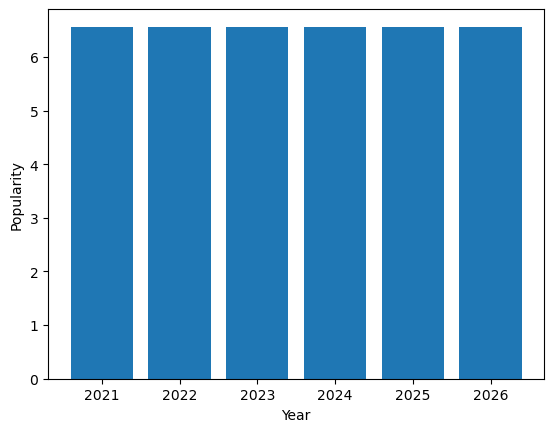

       2021      2022      2023      2024      2025      2026
0  6.563805  6.561427  6.559049  6.556672  6.554294  6.551917


In [176]:
xyz = pred_years(year_pred(6,'Wilfred Jackson'))


print(xyz)